Используя датасет о стоимости акций Сбербанка с 01.01.2013 года:

https://storage.yandexcloud.net/academy.ai/SBER.csv

визуализируйте индикатор "Полосы Боллинджера", проанализируйте график, и предложите вариант торговли акциями Сбербанка с помощью этого инструмента.

**Подсказка.**
Индикатор выглядит как полоса из трех линий:

* линия посередине — это простая скользящая средняя (SMA) с периодом `ma_size`, обычно около 20 дней;

* верхняя и нижняя линии (BB) — построены на основе SMА, но к нему добавлено стреднеквадратичное отклонение:

```
 SMA = data['close'].rolling(ma_size).mean()
 df['SMA_5'] = df['Close'].rolling(5).mean().shift()

 BB_UP = SMA + data['close'].rolling(ma_size).std() * bol_size
 BB_DOWN = SMA - data['close'].rolling(ma_size).std() * bol_size
   
```

где bol_size - ширина коридора, подбирается по графику. Выберите такое его значение, чтобы по графику можно было принимать торговые решения.

In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/SBER.csv

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.read_csv('./SBER.csv')
df[['Date', 'Open', 'High', 'Low', 'Close', 'VOL']] = df['DATE;OPEN;HIGH;LOW;CLOSE;VOL'].str.split(';', expand=True)

df = df[['Date', 'Open', 'High', 'Low', 'Close', 'VOL']]
df['Date'] = pd.to_datetime(df['Date'])



--2024-07-14 09:17:37--  https://storage.yandexcloud.net/academy.ai/SBER.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180264 (176K) [text/csv]
Saving to: ‘SBER.csv.1’

SBER.csv.1          100%[===================>] 176.04K   142KB/s    in 1.2s    

2024-07-14 09:17:40 (142 KB/s) - ‘SBER.csv.1’ saved [180264/180264]



In [ ]:
df['Open'] = pd.to_numeric(df['Open'], errors="coerce")
df['High'] = pd.to_numeric(df['High'], errors="coerce")
df['Low'] = pd.to_numeric(df['Low'], errors="coerce")
df['Close'] = pd.to_numeric(df['Close'], errors="coerce")
df['VOL'] = pd.to_numeric(df['VOL'], errors="coerce")

In [ ]:
df['sma_20'] = df['Close'].rolling(20).mean()
df['up'] = df['sma_20'] + df['Close'].rolling(20).std() * 2
df['down'] = df['sma_20'] - df['Close'].rolling(20).std() * 2
df.dropna(inplace=True)
df.index = range(len(df))

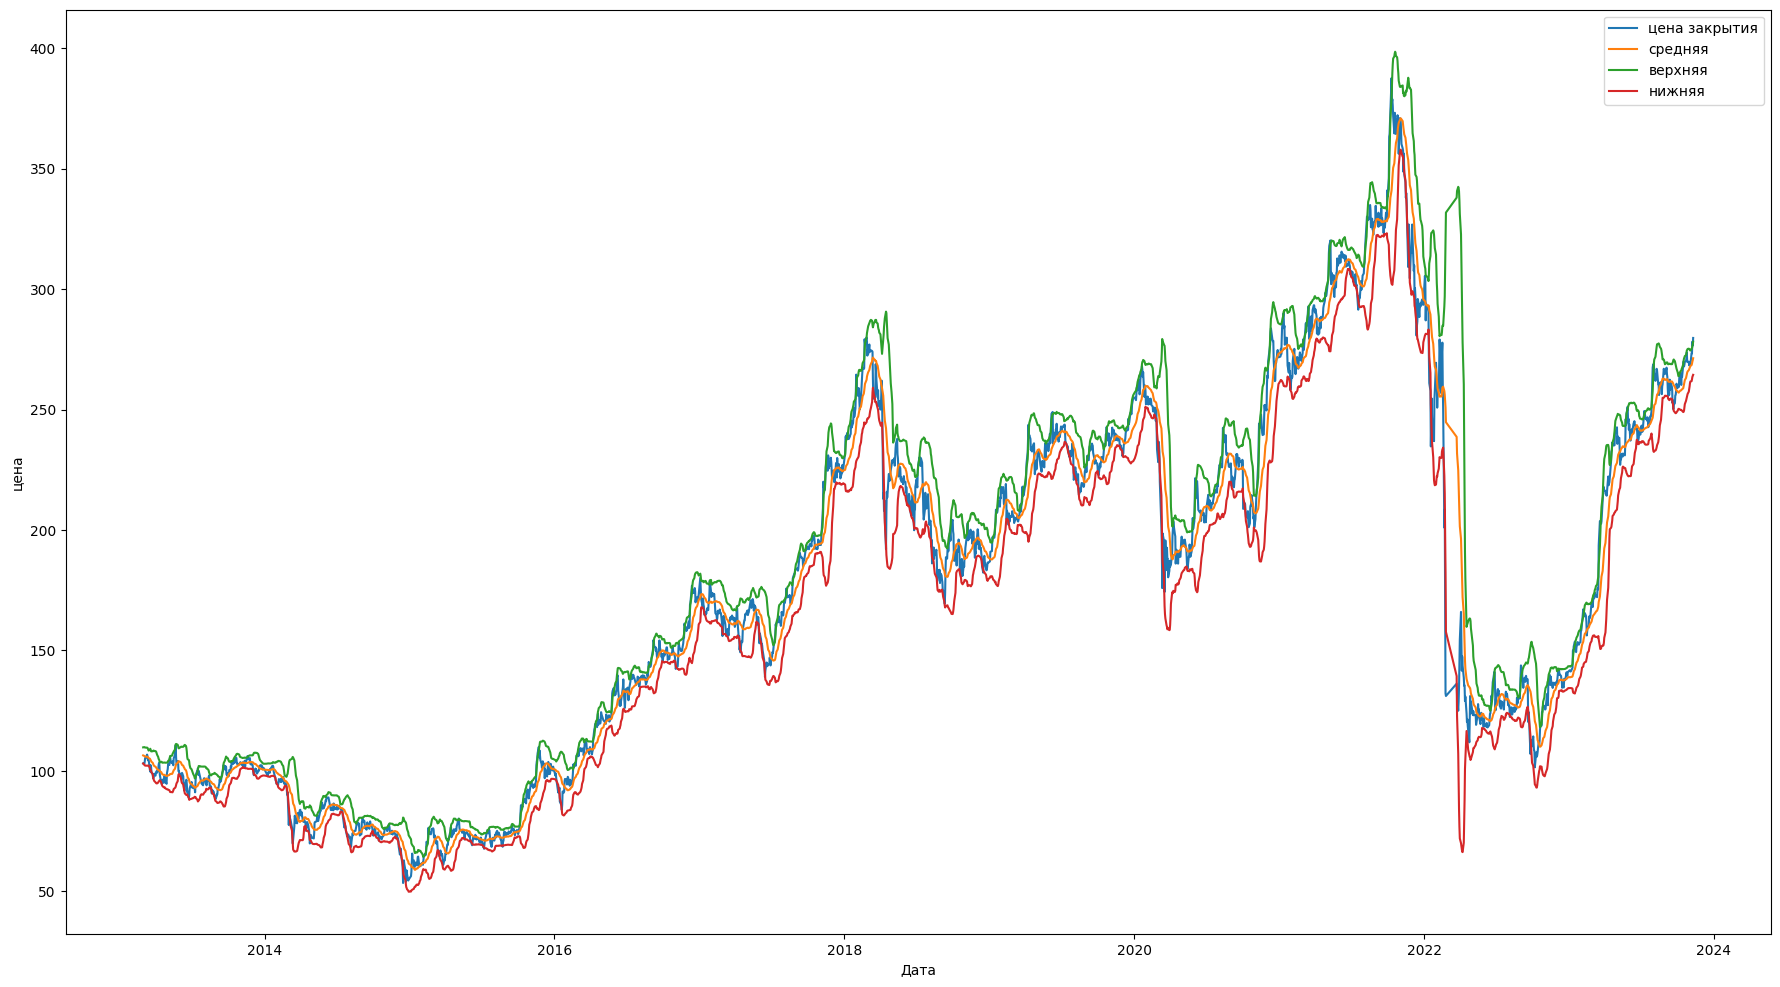

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 12))
plt.plot(df.Date, df['Close'], label = 'цена закрытия')
plt.plot(df.Date, df['sma_20'], label = 'средняя')
plt.plot(df.Date, df['up'], label = 'верхняя')
plt.plot(df.Date, df['down'], label = 'нижняя')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('цена')
plt.show()

In [ ]:
fig = go.Figure()
fig.add_scatter(x=df.Date, y=df.sma_20, name='sma_20')
fig.add_scatter(x=df.Date, y=df.up, name='up')
fig.add_scatter(x=df.Date, y=df.down, name='down')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
df

,Date,Open,High,Low,Close,VOL,sma_20,up,down
0,2013-06-21,90.90,93.18,90.10,91.50,79847940,97.3715,247.539903,172.455701
1,2013-06-24,90.52,91.70,88.54,88.88,91485720,96.6615,246.829903,171.745701
2,2013-06-25,88.91,90.64,88.81,89.57,88414110,95.9965,246.164903,171.080701
3,2013-06-26,89.99,92.65,89.30,92.51,94164830,95.4170,245.585403,170.501201
4,2013-06-27,93.05,93.74,91.88,93.24,76444040,95.0810,245.249403,170.165201
...,...,...,...,...,...,...,...,...,...
2599,2023-11-06,269.00,273.87,268.62,273.42,29231770,268.4680,418.636403,343.552201
2600,2023-11-07,273.08,274.78,272.20,273.31,32183320,268.9835,419.151903,344.067701
2601,2023-11-08,273.53,278.35,273.28,278.15,58000060,269.8805,420.048903,344.964701
2602,2023-11-09,278.60,278.85,276.02,276.65,28258660,270.4880,420.656403,345.572201


In [ ]:
fig = make_subplots(rows=3, cols=1)

fig.add_scatter(x=df.Date, y=df.sma_20, name='sma_20', row=1, col=1)
fig.add_scatter(x=df.Date, y=df.up, name='up', row=2, col=1)
fig.add_scatter(x=df.Date, y=df.down, name='down', row=3, col=1)

fig.show()

In [ ]:
# https://www.kaggle.com/code/tencars/interactive-bollinger-bands-for-technical-analysis - списано от туда - но там еще пунктиры есть - вообщем не особо понятно как тут работает
fig = go.Figure(data=[go.Candlestick(x = df.index, open = df['Open'], high = df['High'], low = df['Low'], close = df['Close'])])

for i in ['sma_20', 'up', 'down']:
    fig.add_trace(go.Scatter(x=df['Date'], y=df[i],
                             showlegend = False,
                             line_color = 'gray',
                             mode='lines',
                             line={'dash': 'dash'},
                             marker_line_width=2,
                             marker_size=10,
                             opacity = 0.8))

fig.show()

In [ ]:
# вообщем нарисовал какие то графики, по каким то формулам - что оно делает непонятно - и какие из этого можно сделать выводы тоже непонятно